# MTH 651: Advanced Numerical Analysis

## Lecture 2

### Topics

* Variational form of the governing equations
* Finite element formulation in 1D
* Proof of accuracy
  * $L^2$ norm
  * max-norm

#### Textbook references

Sections 1.1, 1.2, 1.3, 1.4

### Variational form of the equations

Recall our model problem on $\Omega = [0,1]$
$$ (D)~
\left\{
   \begin{aligned}
      -u''(x) &= f(x) \\
      u(0) &= 0 \\
      u(1) &= 0
   \end{aligned}
\right.
$$

The finite element method proceeds by showing that the solution to the differential equation $(D)$ is **also** the solution a minimization problem $(M)$ and a variational problem $(V)$ (we will define what a variational problem is).

We introduce some notation.
For (continuous, bounded) functions $u, v : [0,1] \to \mathbb{R}$, let $(u, v)$ denote
$$
    (u,v) = \int_0^1 u(x) v(x) \, dx
$$
This is called the $L^2$ inner product (we will talk more about these definitions later).



Recall that a function $(\cdot, \cdot) : V \times V \to \mathbb{R}$, where $V$ is a vector space, is called an **inner product** if it satisfies the following properties:

1. **Symmetric.** $(u,v) = (v,u)$ for all $u,v \in V$.
2. **Bilinearity.** We state first linearity in the first argument: $(au_1 + bu_2, v) = a(u_1, v) + b(u_2, v)$ for all $a,b \in \mathbb{R}$ and $u_1,u_2,v \in V$. By the symmetry property, we also have linearity in the second argument (and hence "bilinearity").
3. **Positive-definiteness.** $(u,u) \geq 0$ and $(u,u) = 0$ only when $u = 0$.

**Exercise:** check that the $L^2$ inner product defined above satisfies these properties.

Consider the vector space
$$
    V = \{ 
        v : [0,1] \to \mathbb{R} : \text{$v$ is continuous and bounded, $v'$ is continous and bounded, and $v(0) = v(1) = 0$}
    \}.
$$

**Exercise:** verify that that $V$ is a vector space.
It turns out that $(\cdot,\cdot)$ defines an inner product on $V$ (you can check this too), but we won't dwell on this point.

Consider the functional (in the textbook they say linear functional --- this is not true, can you see why?)
$$
    F(v) = \frac{1}{2} (v', v') - (f, v).
$$
The minimization problem $(M)$ is to find $u \in V$ that **minimizes** $F$, in other words, find $u \in V$ such that
$$
    F(u) \leq F(v) \quad\text{for all $v \in V$}.
$$
In this context, $F$ represents a kind of "energy", and minimizing $F$ is finding the solution with minimal energy.

We will show (shortly) that the solution to $(D)$ is also the minimizer to $(M)$.


Finally, we consider the **variational problem** $(V)$.
This problem can be stated as follows.

Find $u \in V$ such that, for all $v \in V$,
\begin{equation}
\tag{$V$}
    (u', v') = (f, v).
\end{equation}

Is this variational problem well-posed?
i.e., is the solution unique?

Suppose $u_1$ and $u_2$ **both** solve $(V)$.

Then, for **any** $v \in V$,
$$
    ((u_1 - u_2)', v) = (u_1', v) - (u_2', v) = (f, v) - (f, v) = 0.
$$
Choosing $v = u_1 - u_2$, this gives
$$
    ((u_1 - u_2)', (u_1 - u_2)') = \int_0^1 ((u_1-u_2)')^2 \, dx = 0.
$$
This means that $(u_1 - u_2)' = 0$ for all $x \in [0,1]$, so $u_1 - u_2$ is **constant**.
However, since $u_1, u_2 \in V$ (and so $u_1 - u_2 \in V$), we have that $(u_1 - u_2)(0) = 0$, and so $u_1 - u_2 \equiv 0$, and so $u_1 = u_2$ (and therefore the solution is unique).

Note that if $u$ solves $(V)$, then $u$ must solve $(M)$ too.
How can we see that?

Suppose $u$ solves $(V)$, and take arbitrary $w \in V$.
Then, we want to show that $F(w) \geq F(u)$.

Note that
$$
    F(w) = F(w - u + u),
$$
and
$$
    F(w-u+u) = \frac{1}{2}(u', u') + (u', (w-u)') + \frac{1}{2}((w-u)', (w-u)') - (f,u) - (f,w-u).
$$
By property $(V)$, we then have
$$
F(w-u+u) = \frac{1}{2}(u', u') + \frac{1}{2}((w-u)', (w-u)') - (f,u) = F(u) + \frac{1}{2}((w-u)', (w-u)').
$$
Now note that
$$
    ((w-u)',(w-u)') = \int_0^1 ((w-u)')^2\,dx \geq 0,
$$
so
$$
    F(w) \geq F(u)
$$
as desired.

It is possible (see the textbook) to also show that the minimizer must solve $(V)$.

This shows that $(V) \Leftrightarrow (M)$.

Now, we show that if $u$ solves the **differential equation** $(D)$, then $u$ must also solve $(V)$ (and hence $(M)$).

This procedure is very important.
It illustrates how the **variational formulation** of the problem is derived;
this is a general methodology that will be used to come up with finite element methods for differential eqiuations.

Since $u$ solves $(D)$, we have that $-u'' = f$.
Multiply this equation by some arbitrary function (called a **test function**) $v \in V$.
Then,
$$
    - u'' v = f v.
$$
Integrate both sides over $[0,1]$ to obtain
$$
    -\int_0^1 u'' v \, dx = \int_0^1 f v \,dx.
$$
Now, integrate the left-hand side **by parts** (integration by parts is one of the most fundamental tools in finite element analysis) to obtain
$$
    \int_0^1 u' v' \, dx - [u'v]_0^1 = \int_0^1 f v \, dx.
$$
Since $v \in V$, we have that $v(0) = v(1) = 0$, and so the second term on the left-hand side is equal to zero.
We therefore conclude that
$$
    (u', v') = (f, v).
$$
Since the test function $v$ was arbitrary, this holds for all $v \in V$, and so $u$ solves $(V)$.

This shows $(D) \implies (V)$.

Finally, suppose $u$ solves $(V)$.
Suppose, furthermore, than $u''$ exists and is continuous.

Then, integrating by parts and using $(V)$ gives
$$
    (u', v') = -(u'', v) + [u',v]_0^1 = (f, v).
$$
Since $v(0) = v(1) = 0$, we have
$$
    -(u'', v) = (f, v)
$$
or, equivalently,
$$
    (u'' + f, v) = 0
$$
for all $v \in V$.

This implies that $u'' + f = 0$ (why?), and hence $-u'' = f$, and so $u$ satisfies $(D)$.

### Finite element methods (Galerkin methods)

Instead of working directly with the differential equation $(D)$, it will be much more convenient to work with the variational formulation $(V)$.

The idea by the "Galerkin method" (of which the finite element method is a specific instance) is very simple:
rather than solving $(V)$ over the whole space $V$ (which is infinite dimensional), we solve over a finite-dimensional subspace $S$ (say of dimension $N$).

The finite-dimensional problem becomes: find $u_S \in S$ such that, for all $v_S \in S$,
\begin{equation} \tag{$S$}
    (u_S', v_S') = (f, v_S).
\end{equation}
The same argument that showed that the solution to $(V)$ was unique shows that $(S)$ has a unique solution.

Since $S$ is finite-dimensional, it has a basis $\{ \phi_1, \phi_2, \ldots, \phi_N \}$.
Define the matrix $A$ by
$$
    A_{ij} = (\phi_i', \phi_j')
$$
and the vector $\boldsymbol{b}$ by
$$
    b_i = (f, \phi_i).
$$

Suppose that $u_S \in S$ solves $(S)$.
Expand $u_S$ in the basis,
$$
    u_S = \sum_{i=1}^N u_i \phi_i.
$$
Let $\boldsymbol u$ denote the vector $\boldsymbol u = (u_1, u_2, \ldots, u_N)$.
Then,
$$
    (A \boldsymbol u)_i = \sum_{j=1}^N (\phi_i', \phi_j') u_j
    = \sum_{j=1}^N (\phi_i', u_j \phi_j')
    = (\phi_i', \sum_{j=1}^N u_j \phi_j')
    = (\phi_i', u_S')
    = b_i,
$$
so the **linear system of equations**
$$
    A \boldsymbol u = \boldsymbol b
$$
is **equivalent** to the finite-dimensional variational problem $(S)$.

The solution to the finite-dimensional problem $(S)$ will, in general, not be equal to that of the $(V)$;
however, it may provide a good approximation.

The **main idea** of the finite element method is to choose a sequence of subspaces $S_1, S_2, S_3, \ldots$ of **increasing dimension**.
For each $S_i$ we can obtain the solution $u_i$ to the associated finite-dimensional problem.
We want to choose the spaces in such a way that $u_i \to u$, where $u$ is the true solution.
The finite element method gives us a systematic way of doing that.

Recall the variational problem
$$
    (u', v') = (f, v).
$$
We introduce the notation $a(\cdot, \cdot)$ to denote
$$
    a(u,v) = (u', v').
$$
The form $a(\cdot,\cdot)$ is known as a **bilinear form** (it is linear in each argument separately).
Furthermore, $a(\cdot, \cdot)$ is **symmetric**.
Finally, on $V$, $a(\cdot,\cdot)$ is **positive-definite**. (Why?)

The matrix $A$ above is known as the stiffness matrix.

$A$ inherits the properties of the associated bilinear form;
$A$ is symmetric and positive-definite.

(Recall that a matrix is **symmetric** if $A^T = A$ and **positive-definite** if $\boldsymbol v^T A \boldsymbol v > 0$ for all vectors $\boldsymbol v$).

### Piecewise linear finite element spaces

Let $0 = x_0 < x_1 < \cdots < x_n < x_{n+1} = 1$ be a partition of $[0,1]$ (in multiple dimensions we will use a **mesh**).
Let $S$ be the sapce of functions $v$ such that
* $v \in C^0([0,1])$
* $v$ restricted to each subinterval $[x_i, x_{i+1}]$ is a linear function
* $v(0) = v(1) = 0$

$S$ is a finite-dimensional function space of dimension $n$.
For $1 \leq i \leq n$, define the function $\phi_i$ by 
$$
   \phi_i(x_j) = \delta_{ij} = \begin{cases}
      1 & \quad \text{if $i=j$} \\
      0 & \quad \text{otherwise}
   \end{cases}
$$
These functions are often informally called _hat functions_.

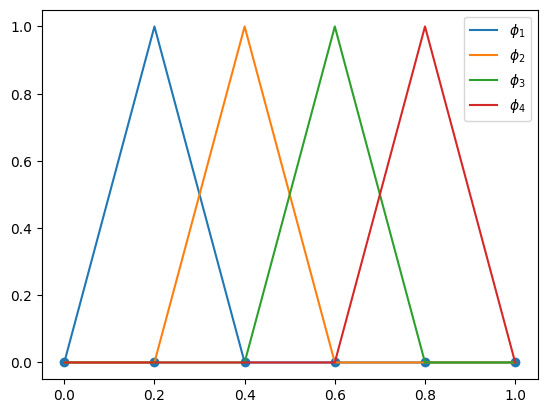

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create some uniformly spaced points
n = 4
x = np.linspace(0, 1, n+2)

def phi(i):
   y = np.zeros(n+2)
   y[i] = 1
   return y

plt.scatter(x, 0*x)
plt.plot(x, phi(1), label="$\\phi_1$")
plt.plot(x, phi(2), label="$\\phi_2$")
plt.plot(x, phi(3), label="$\\phi_3$")
plt.plot(x, phi(4), label="$\\phi_4$")
plt.legend()
plt.show()

> _TERMINOLOGY:_ 
> * The points $x_i$ are called **nodes**
> * The point values $v(x_i)$ are called **nodal values**
> * The basis $\{ \phi_i \}$ is called a **nodal basis**

In the above example, the points $x_i$ are evenly spaces. In general, they **do not** need to be evenly spaced; this is one example of the nice flexibility of the finite elemnent method.
As in finite difference methods, we use $h$ to denote the spacing.
The finite element space is often denotes $V_h$; in the general case (where the spacing is not uniform), the subscript $h$ is just a symbol to mean "discrete".

> **_LEMMA:_** $\{ \phi_i \}$ forms a basis for $S$

> _Proof._ 
> We show that $\{ \phi_i \}$ is linearly independent and spans $S$.
>
> Let $v(x) = \sum_{i=1}^n V_i \phi_i(x)$.
> Then, $v(x_i) = V_i$ (i.e. the coefficients $V_i$ are the nodal values of $v$).
> So, $v \equiv 0$ if and only if $V_i = 0$ for all $i$, and so $\{ \phi_i \}$ is linearly independent.
>
> Now, we show $\{ \phi_i \}$ spans $S$.
> Let $v \in V$ be arbitrary, and let $V_i = v(x_i)$.
> Then, we can verify that $v = \sum_{i=1}^n V_i \phi_i(x)$.

> _NOTE:_ For any continuous $f \in C^0([0,1])$, the function $f_I(x) \sum_{i=1}^n f(x_i) \phi_i(x)$ is called the **nodal interpolant** of $f$

Applying the Galerkin method to the space of piecewise linear functions, we obtain the matrix $A$ defined by
$$
    A_{ij} = \int_0^1 \phi_i'(x) \phi_j'(x) \, dx.
$$
Note that $\phi_i$ is uniformly zero outside of the two intervals containing the vertex $i$.
Therefore, $\phi_i'$ vanishes outside these two intervals as well.
That means that if $i$ and $j$ are vertices that do not share a common interval, then $\phi_i'(x) \phi_j'(x)$ is uniformly zero.
Consequently, most of the entries of $A_{ij}$ are zero.
In row $i$, the only entries that are nonzero correspond to vertices $i-1$, $i$, and $i+1$.
This means that the matrix is **tridiagonal**.

### Error analysis for the Galerkin method

Suppose $S$ is any finite-dimensional subspace of $V$.
Let $u_S$ solve the finite-dimensional problem $(S)$, and $u$ solve the infinite-dimensional problem $(V)$.
(We can think of $u_S$ as the "approximate solution" and $u$ as the "true solution").
Then
$$
    a(u_S - u, v_S) = 0
$$
for all $v_S \in S$.
This is a very important property known as **Galerkin orthogonality**.

For now, we will measure the error using the **norm induced by the bilinear form** $a(\cdot, \cdot)$.

Recall that a function $\| \cdot \| : V \to \mathbb{R}$ is called a **norm** if it satsifies:

1. **Positive definiteness.** $\| v \| \geq 0$ and $\| v \| = 0$ only when $v = 0$.
2. **Absolute homogeneity.** $\| a v \| = |a| \| v \|$ for all $a \in \mathbb{R}$, $v \in V$.
3. **Triangle inequality.** $\| u + v \| \leq \|u \| + \| v \|$ for all $u, v \in V$.

Any inner product $(\cdot, \cdot)$ **induces** a norm $\| \cdot \|$ defined by
$$
    \| u \| = (u, u)^{1/2}
$$

The $L^2$ inner product $(\cdot, \cdot)$ induces the $L^2$ norm $\|\cdot\|_0$ (often abbreviated $\|\cdot\|$)
$$
    \| u \|_0 = (u, u)^{1/2} = \left(\int_0^1 u^2(x) \, dx \right)^{1/2}.
$$

The bilinear form $a(\cdot, \cdot)$ induces the norm $\| \cdot \|_A$ defined by
$$
    \| u \|_A = a(u,u)^{1/2} = \left( \int_0^1 (u')^2 \, dx \right)^{1/2}
$$
which is known as the **energy norm**.

#### Cauchy-Schwarz inequality

One of the most important results concerning norms and inner products is the **Cauchy-Schwarz inequality**.
This inequality states that, if $(\cdot,\cdot)$ is an inner product, and $\| \cdot \|$ is the induced norm, then
$$
    |(u, v)| \leq \| u \| \, \| v \|.
$$
Equality holds if and only if $u$ and $v$ are colinear (one is a scalar multiple of the other).

#### Galerkin orthogonality

As a consequence of Galerkin orthogonality, we have the following theorem.

**Theorem 1.1** Let $u_S$ solve $(S)$ and let $u$ solve $(V)$. For any $v_S \in S$, we have
$$
    \| u_S - u \|_A \leq \| v_S - u \|_A,
$$
in other words, $u_S$ minimizes the error (in the energy norm) $\| u_S - u \|_A$ among all elements of the space $S$.

_Proof._
Let $v_S \in S$ be arbitrary.
Then,
$$
    \| v_s - u \|_A^2 =
    a(v_s - u, v_s - u)
    = a(v_S - u_S + u_S - u, v_S - u_S + u_S - u).
$$
Expanding,
$$
    a(u_S - u, u_S - u) + 2 a(u_S - u, v_S - u_S) + (v_S - u_S, v_S - u_S).
$$
Note that the middle term is exactly equal to zero by Galerkin orthogonality (since $v_S - u_S \in S$).
The result follows.

#### Interpolation accuracy

What are the accuracy properties of the nodal interpolant?

**_THEOREM:_** Let $h = \max h_i$ (where $h_i = x_i - x_{i-1}$).
Then,
$$ \| u - u_I \|_A \leq C h \| u'' \|_0 $$
for $C$ independent of $h$ and $u$.

_Proof._ 
It suffices to prove the result over each subinterval, i.e.
$$
 \int_{x_{j-1}}^{x_j} (u - u_I)'(x)^2 \, dx \leq c h_j \int_{x_{j-1}}^{x_j} u''(x)^2 \, dx
$$
The result will then follow by summing over $j$.

Denote the error $e = u - u_I$.
Since $u_I$ is linear on each interval, we have $u'' = e''$ on each interval.
Then, the condition above is equivalent to
$$
 \int_{x_{j-1}}^{x_j} e'(x)^2 \, dx \leq c h_j \int_{x_{j-1}}^{x_j} e''(x)^2 \, dx
$$
We perform a change of variables,
$$ x = x_{j-1} + h_j \tilde{x} $$
so that this is equivalent to
$$
 \int_0^1 \tilde{e}'(\tilde{x})^2 \, d\tilde{x} \leq c \int_0^1 \tilde{e}''(\tilde{x})^2 \, d\tilde{x}
$$
where $\tilde{e}(\tilde{x}) = e(x(\tilde{x}))$.

To simplify notation, write $\tilde{e}(\tilde{x}) = w(t)$.
We have $w(0) = w(1) = 0$ since the interpolation error is zero at the nodes.
By Rolle's theorem, $w'(\xi) = 0$ for some $\xi \in (0,1)$.
So,
$$ w'(y) = \int_\xi^y w''(t) \, dt $$
Applying Cauchy-Schwarz to the right-hand side,
$$
 \begin{aligned}
    | w'(y) | = \left| \int_\xi^y w''(t) \, dt \right|
       &= \left| \int_\xi^y 1 \cdot w''(t) \, dt \right| \\
       &\leq |y - \xi|^{1/2} \left(\int_\xi^y w''(t)^2 \, dt \right)^{1/2} \\
       &\leq |y - \xi|^{1/2} \left(\int_0^1 w''(t)^2 \, dt \right)^{1/2} \\
       &= |y - \xi|^{1/2} \ \| w'' \|_0^{1/2}
 \end{aligned}
$$
Squaring and integrating over $y$,
$$
 \begin{aligned}
    \| w \|_A^2 \leq \| w'' \|_0 \int_0^1 |y - \xi| \, dy.
 \end{aligned}
$$
Choosing $c$ such that $c \geq \int_0^1 (y - \xi) \, dy$ for all $\xi$, we obtain the desired result (i.e. can take $c = 1/2$).

#### $L^2$ norm convergence

The previous argument tells us the rate of convergence of the finite element approximation $u_h$ to the true solution $u$ **in the energy norm**.
This measures the error of the derivative of $u_h$ compared with the derivative of $u$.
However, we often also want to know how the error of $u_h$ _in terms of values_ behaves;
one way of measuring this is using the $L^2$ norm.
We want to know if and how quickly the $L^2$ error
$$
    \| u_h - u \|_0^2 = \int_0^1 (u_h - u)^2 \, dx
$$
converges to zero.

The standard way to derive error estimates in $L^2$ from error estimates in the energy norm is using what is known as a **duality argument**.

Recall that $u$ is the solution to the problem
$$
    \left\{
    \begin{aligned}
        -u'' &= f \quad\text{in $[0,1]$}, \\
        u(0) = u(1) &= 0.
    \end{aligned} \right.
$$
Let $u_h$ be the finite element approximation.
Consider the **related** (_dual_) problem: find $w$ that satisfies
$$
    \tag{$D'$} \left\{
    \begin{aligned}
        -w'' &= u - u_h \quad\text{in $[0,1]$}, \\
        w(0) = w(1) &= 0.
    \end{aligned} \right.
$$
<!-- If $w$ solves the related differential equation $(D')$, then it must also solve the associated variational problem $(V')$, i.e.
$$
    (w', v') = (u - u_h, v)
$$
for all test functions $v$. -->
Then, integrating by parts,
$$
    \begin{aligned}
        \| u - u_h \|_0^2
            &= (u - u_h, u - u_h) \\
            &= (u - u_h, -w'') \\
            &= ( (u-u_h)', w') \\
            &= a(u-u_h, w) \\
            &= a(u-u_h, w - v)
    \end{aligned}
$$
for _any_ $v \in V_h$, using Galerkin orthogonality.
The Cauchy-Schwarz inequality implies
$$
    a(u-u_h, w - v) \leq \| u - u_h \|_A \| w - v \|_A,
$$
for any such $v$.
In particular, we can take the infimum over all $v \in V_h$,
$$
    a(u-u_h, w - v) \leq \| u - u_h \|_A \inf_{v \in V_h} \| w - v \|_A.
$$
Choosing, for example, $v$ to be the nodal interpolant and using the accuracy result proved earlier, we have that
$$
\begin{aligned}
    \| u - u_h \|_A &\leq C h \| u'' \|_0, \\
    \inf_{v \in V_h} \| w - v \|_A &\leq C h \| w'' \|_0.
\end{aligned},
$$
from which we have
$$
    a(u-u_h, w - v) \leq C^2 h^2 \| u'' \|_0 \| w'' \|_0.
$$
To conclude, since $-w'' = u - u_h$, we have that
$$
    \| u - u_h \|_0^2 = \| u - u_h \|_0 \| w'' \|_0,
$$
and
$$
    \| u - u_h \|_0 \leq C^2 h^2 \| u'' \|_0 = C^2 h^2 \| f \|_0.
$$

### Max-norm convergence

The energy norm and $L^2$ norm estimates shown above all involve _integrated_ measures of the error.
It is also interested in looking at _pointwise_ error estimates.
Can we obtain a bound on the max-norm of the error?

Let $s \in [0,1]$ be a given point.
Let us try to estimate $u(s) - u_S(s)$, the error at point $s$.
Define the _Green's function_ $g_s(x)$ by
$$
   g_s(x) = \begin{cases}
      x - s x &\quad x < z \\
      s - s x &\quad \text{otherwise}
   \end{cases}
$$
A property of the Green's function is that $a(v, g_s) = v(s)$ for any $v$.
This can be seen by computing
$$
   \begin{aligned}
      a(v, g_s)
         &= \int_0^1 v'(x) g_s'(x) \, dx \\
         &= \int_0^s v'(x) g_s'(x) \, dx + \int_s^1 v'(x) g_s'(x) \, dx
   \end{aligned}
$$
Integrating each of the two integrals on the right-hand side by part, the resulting term involving $g_s''(x)$ vanishes, and we are left with
$$
   [v g_s']_0^s + [v g_s']_s^1 = (1-s) v(s) - (-s)v(s) = v(s).
$$

Note that $g_s$ is **piecewise linear**, and so $g_{x_i} \in S$ for each node $x_i$.
By Galerkin orthogonality,
$$
   a(u - u_S, g_{x_i}) = 0,
$$
and so
$$
   u(x_i) - u_S(x_i) = a(u - u_S, g_{x_i}) = 0,
$$
and we see that the piecewise linear finite element approximation $u_S$ **interpolates** the exact solution at the nodes, i.e. $u_S = u_I$.
A Taylor series argument can be used to bound the max-norm error of the interpolant $u_I$, which as a result gives:

**_THEOREM:_** $$ \| u - u_S \|_{\max} \leq C h^2 \| u'' \|_{\max}. $$